<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dump-the-Dataset" data-toc-modified-id="Dump-the-Dataset-1">Dump the Dataset</a></span></li><li><span><a href="#Pseudolabel-Loading-from-TFDS" data-toc-modified-id="Pseudolabel-Loading-from-TFDS-2">Pseudolabel Loading from TFDS</a></span><ul class="toc-item"><li><span><a href="#Extract-all-routes" data-toc-modified-id="Extract-all-routes-2.1">Extract all routes</a></span></li></ul></li></ul></div>

In [1]:
from bfseg.data.fsdata import load_fsdata
import os
import json

In [24]:
datapath = '/home/blumh/asl/rss_2021_data/pickelhaube_full_office4'
if not os.path.exists(os.path.join(datapath, 'dataset_info.json')):
    with open(os.path.join(datapath, 'dataset_info.json'), 'w') as f:
        json.dump({
            'output_shapes': {'rgb': [None, None, 3], 'labels': [None, None]},
            'output_types': {'rgb': 'float32', 'labels': 'int32'}
        }, f)
ds = load_fsdata(datapath)
blob = next(ds.as_numpy_iterator())

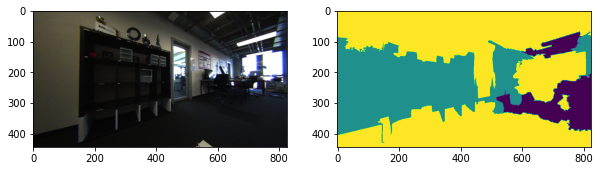

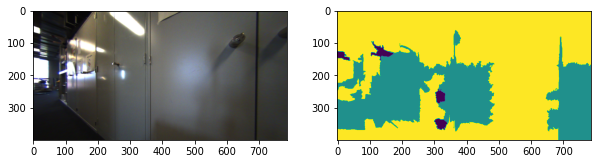

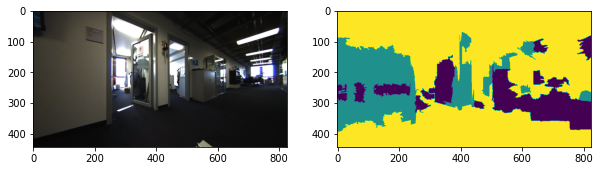

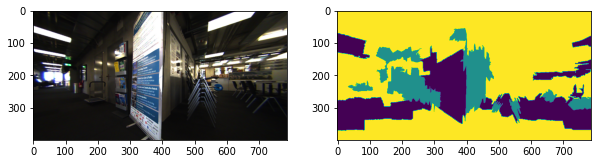

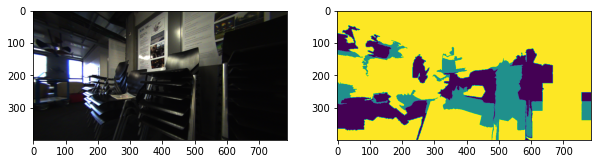

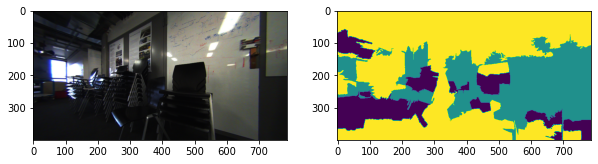

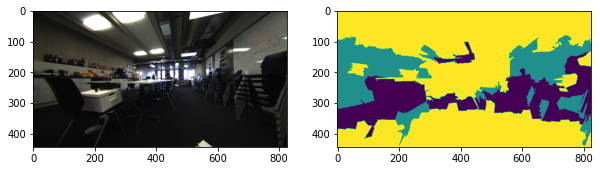

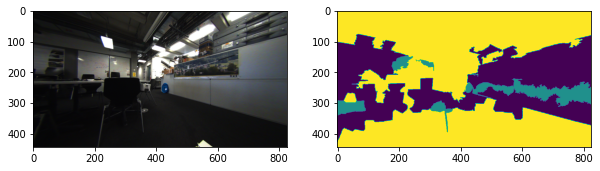

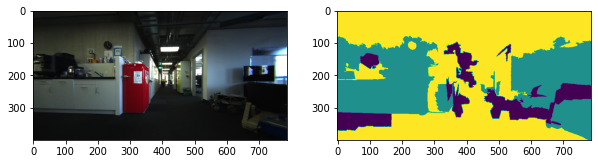

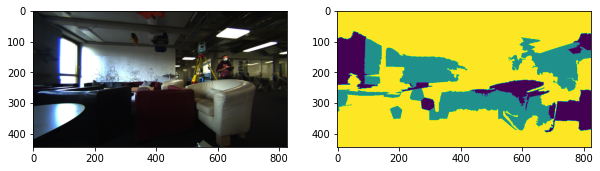

In [25]:
import matplotlib.pyplot as plt
for blob in ds.shard(20, 0).take(10).as_numpy_iterator():
    _, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(blob['rgb'] / 255)
    axs[1].imshow(blob['labels'])

# Dump the Dataset

In [18]:
from shutil import make_archive

make_archive(datapath, 'zip', datapath)

'/home/blumh/asl/rss_2021_data/pickelhaube_full_garage3.zip'

In [19]:
!rclone copy {datapath}.zip construction:/background_foreground_segmentation_paper/pseudolabels/

# Pseudolabel Loading from TFDS

In [1]:
import bfseg.data.pseudolabels
import tensorflow_datasets as tfds

tfds.load('meshdist_pseudolabels')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating rumlang3 examples...: 0 examples [00:00, ? examples/s]

Shuffling meshdist_pseudolabels-rumlang3.tfrecord...:   0%|          | 0/391 [00:00<?, ? examples/s]

Generating rumlang2 examples...: 0 examples [00:00, ? examples/s]

Shuffling meshdist_pseudolabels-rumlang2.tfrecord...:   0%|          | 0/268 [00:00<?, ? examples/s]

Dataset meshdist_pseudolabels downloaded and prepared to /home/blumh/tensorflow_datasets/meshdist_pseudolabels/0.1.0. Subsequent calls will reuse this data.


{'rumlang3': <PrefetchDataset shapes: {filename: (), image: (None, None, 3), label: (None, None, 1)}, types: {filename: tf.string, image: tf.uint8, label: tf.uint8}>,
 'rumlang2': <PrefetchDataset shapes: {filename: (), image: (None, None, 3), label: (None, None, 1)}, types: {filename: tf.string, image: tf.uint8, label: tf.uint8}>}

## Extract all routes

In [92]:
regex_pattern = "(.*)_img_(\d+)_semseg\.png"
all_labels = dl_cla.labels

In [93]:
all_routes = set([re.search(regex_pattern, os.path.basename(label)).group(1) for label in all_labels])

In [94]:
dataset_information = {}

In [95]:
for route in all_routes:
    print(route)
    info_file = os.path.join(train_path, f"{route}_info.txt")
    dataset_information[route] = pd.read_csv(info_file, header=None, sep=',|;', engine="python")

cam0
cam1
cam2


In [96]:
img_timestamps = []
for label in all_labels:
    match = re.search(regex_pattern, os.path.basename(label))
    route, number = match.group(1), int(match.group(2))
    timestamp = dataset_information[route].iloc[number,1]
    img_timestamps.append(route +"_"+ str(timestamp))

In [97]:
datasets = [("CLA_FUSED", ds_cla, img_timestamps)]

In [98]:
dump_meshdist_ds_to_h5(datasets, dump_depth = False)

In [27]:
import bfseg.data.nyu_subsampled
import tensorflow_datasets as tfds

tfds.load('nyu_subsampled')

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html